In [1]:
# Dataset was provided by CrowdSec.

# ## The code used to create test dataset
# import pandas as pd
# from sklearn.model_selection import train_test_split

# # Load the dataset
# df = pd.read_csv("dataset_v2/train.csv")  # Replace with your CSV file path

# # Split the dataset into training and test sets (e.g., 80% training, 20% test)
# train_df, test_df = train_test_split(
#     df, 
#     test_size=0.2,  # 20% of the data will be used for testing
#     random_state=42,  # Set a random seed for reproducibility
#     stratify=df["label"]  # Ensure the distribution of the target variable is maintained
# )

# # Save the training set to a CSV file
# train_df.to_csv("train_dataset.csv", index=False)

# # Save the test set to a CSV file
# test_df.to_csv("test_dataset.csv", index=False)

# print("Training dataset saved to 'train_dataset.csv'.")
# print("Test dataset saved to 'test_dataset.csv'.")

In [2]:
# # SAMPLING FOR SAVING COMPUTATION WHILE DEVELOPMENT!

# import pandas as pd
# # Sample the data for the initial coding
# df_train_sampled = pd.read_csv("train_dataset.csv").sample(frac=0.01, random_state=42)
# df_test_sampled = pd.read_csv("test_dataset.csv").sample(frac=0.01, random_state=42)

# # Save to disk
# df_train_sampled.to_csv("train_sampled.csv", index=False)
# df_test_sampled.to_csv("test_sampled.csv", index=False)

# print("Sampled data saved to disk.")


In [2]:
##### REPLACE THE SAMPLE DATASET WITH THE ACTUAL DATA AT THE END #####
import pandas as pd

# Load training data
df_train = pd.read_csv("train_dataset.csv")
# df_train = pd.read_csv("train_sampled.csv")

# Load test data
df_test = pd.read_csv("test_dataset.csv")
# df_test = pd.read_csv("test_sampled.csv")

In [4]:
# Print the training column names
print("Column Names:", list(df_train.columns))
# Print the first few lines
print("\nFirst 5 Rows of df_train:\n")
df_train.head()

Column Names: ['attack_time', 'watcher_country', 'watcher_as_num', 'watcher_as_name', 'attacker_country', 'attacker_as_num', 'attacker_as_name', 'attack_type', 'watcher_uuid_enum', 'attacker_ip_enum', 'label']

First 5 Rows of df_train:



,attack_time,watcher_country,watcher_as_num,watcher_as_name,attacker_country,attacker_as_num,attacker_as_name,attack_type,watcher_uuid_enum,attacker_ip_enum,label
0,2023-08-18T14:07:08Z,SG,14061,DIGITALOCEAN-ASN,US,14618.0,AMAZON-AES,http:spam,2286,183993,0
1,2023-08-19T04:48:21Z,IL,44709,O.m.c. Computers & Communications Ltd,US,8075.0,MICROSOFT-CORP-MSN-AS-BLOCK,http:scan,8206,98461,0
2,2023-08-09T12:14:56Z,US,47583,Hostinger International Limited,US,8075.0,MICROSOFT-CORP-MSN-AS-BLOCK,http:scan,40984,46333,0
3,2023-08-28T22:01:07Z,PL,50840,HITME.PL,CN,4134.0,Chinanet,http:bruteforce,15044,131515,0
4,2023-08-23T08:31:29Z,US,22611,INMOTION,US,30148.0,SUCURI-SEC,http:scan,17,2550,0


In [5]:
# Print the test column names
print("Column Names:", list(df_test.columns))
# Print the first few lines
print("\nFirst 5 Rows of df_test:\n")
df_test.head()

Column Names: ['attack_time', 'watcher_country', 'watcher_as_num', 'watcher_as_name', 'attacker_country', 'attacker_as_num', 'attacker_as_name', 'attack_type', 'watcher_uuid_enum', 'attacker_ip_enum', 'label']

First 5 Rows of df_test:



,attack_time,watcher_country,watcher_as_num,watcher_as_name,attacker_country,attacker_as_num,attacker_as_name,attack_type,watcher_uuid_enum,attacker_ip_enum,label
0,2023-08-23T21:41:21Z,DE,12897,ENTEGA Medianet GmbH,DE,3320.0,Deutsche Telekom AG,http:spam,24879,51954,0
1,2023-08-11T23:47:44Z,IN,16509,AMAZON-02,SG,14061.0,DIGITALOCEAN-ASN,http:exploit,6601,134936,0
2,2023-08-14T20:19:42Z,DE,51167,Contabo GmbH,CN,4134.0,Chinanet,ssh:bruteforce,19631,118692,0
3,2023-08-17T06:57:38Z,AU,4826,Vocus Connect International Backbone,AT,210644.0,AEZA GROUP Ltd,http:spam,4812,170894,0
4,2023-08-23T08:18:32Z,US,16509,AMAZON-02,IR,61055.0,Roshangar Rayaneh Tehran Co. Ltd.,http:exploit,9563,68950,0


In [6]:
# Check for NaN values in training and testing data
import numpy as np

# Check for NaN values in training data
if df_train.isna().any().any():
    print("Warning: df_train contains NaN values!")
else:
    print("No NaN values found in df_train!")

# Check for NaN values in testing data
if df_test.isna().any().any():
    print("Warning: df_test contains NaN values!")
else:
    print("No NaN values found in df_test.")

In [7]:
# PREPROCESSING


# Forward fill NaN values
df_train = df_train.ffill()
df_test = df_test.ffill()


from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Define categorical and numerical features
categorical_features = [
    "watcher_country", "watcher_as_name", "attacker_country", "attacker_as_name", "attack_type"
]
numerical_features = ["watcher_as_num", "attacker_as_num", "attack_time"]

# Convert attack_time to timestamp, handling NaNs
df_train["attack_time"] = pd.to_datetime(df_train["attack_time"], errors='coerce').fillna(0).astype(np.int64) // 10**9
df_test["attack_time"] = pd.to_datetime(df_test["attack_time"], errors='coerce').fillna(0).astype(np.int64) // 10**9

# Use sparse output for memory efficiency
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=True, dtype=np.float32)
scaler = StandardScaler()

# ColumnTransformer to apply transformations
preprocessor = ColumnTransformer([
    ("cat", encoder, categorical_features),
    ("num", scaler, numerical_features)
])

# Fit the transformer on training data and transform both train and test sets
df_train_transformed = preprocessor.fit_transform(df_train)
df_test_transformed = preprocessor.transform(df_test)

# Ensure the output is sparse and CSR format
df_train_transformed = df_train_transformed.tocsr()
df_test_transformed = df_test_transformed.tocsr()

# Check datasets shape
print(f"Train size: {df_train_transformed.shape}, Test size: {df_test_transformed.shape}")


Train size: (49303748, 11136), Test size: (12325937, 11136)


In [41]:
# TRAINING AND EVALUATING USING TENSORFLOW RNN MODEL

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dropout, Dense, Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
import numpy as np
from sklearn.model_selection import train_test_split

# Create validation set first
X_train_sparse, X_val_sparse, y_train, y_val = train_test_split(
    df_train_transformed,
    df_train["label"].values,
    test_size=0.2,
    random_state=42,
    stratify=df_train["label"]
)

# Convert to one-hot encoding
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

BATCH_SIZE = 512  # Reduced for memory safety

def batch_generator(sparse_data, labels=None, batch_size=BATCH_SIZE):
    n_samples = sparse_data.shape[0]
    while True:  # Infinite loop for Keras
        for i in range(0, n_samples, batch_size):
            batch_end = min(i + batch_size, n_samples)
            batch_data = sparse_data[i:batch_end].toarray().astype(np.float32)
            batch_data = batch_data.reshape(-1, 1, batch_data.shape[1])
            
            if labels is not None:
                batch_labels = labels[i:batch_end]
                yield (batch_data, batch_labels)  # Must return as tuple
            else:
                yield (batch_data,)  # Single element as tuple

# Model architecture
rnnmodel = Sequential([
    Input(shape=(1, X_train_sparse.shape[1])),
    SimpleRNN(32, activation='relu'),
    Dropout(0.2),
    Dense(2, activation='softmax')
])

rnnmodel.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# Create generators
train_gen = batch_generator(X_train_sparse, y_train)
val_gen = batch_generator(X_val_sparse, y_val)
test_gen = batch_generator(df_test_transformed)

# Calculate steps
steps_per_epoch = X_train_sparse.shape[0] // BATCH_SIZE
val_steps = X_val_sparse.shape[0] // BATCH_SIZE
test_steps = df_test_transformed.shape[0] // BATCH_SIZE

# Train the model
history = rnnmodel.fit(
    train_gen,
    steps_per_epoch=steps_per_epoch,
    validation_data=val_gen,
    validation_steps=val_steps,
    epochs=3,
    callbacks=[EarlyStopping(monitor='val_loss', patience=2)]
)

# Evaluation
y_pred_probs = rnnmodel.predict(test_gen, steps=test_steps)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true = df_test["label"].values[:len(y_pred_classes)]

test_accuracy = np.mean(y_pred_classes == y_true)
print(f"Test Accuracy: {test_accuracy:.4f}")

Epoch 1/3
77037/77037 ━━━━━━━━━━━━━━━━━━━━ 728s 9ms/step - accuracy: 0.9909 - loss: 0.0298 - val_accuracy: 0.9921 - val_loss: 0.0223
Epoch 2/3
77037/77037 ━━━━━━━━━━━━━━━━━━━━ 733s 10ms/step - accuracy: 0.9919 - loss: 0.0233 - val_accuracy: 0.9922 - val_loss: 0.0218
Epoch 3/3
77037/77037 ━━━━━━━━━━━━━━━━━━━━ 714s 9ms/step - accuracy: 0.9920 - loss: 0.0228 - val_accuracy: 0.9922 - val_loss: 0.0216
24074/24074 ━━━━━━━━━━━━━━━━━━━━ 171s 7ms/step
Test Accuracy: 0.9922


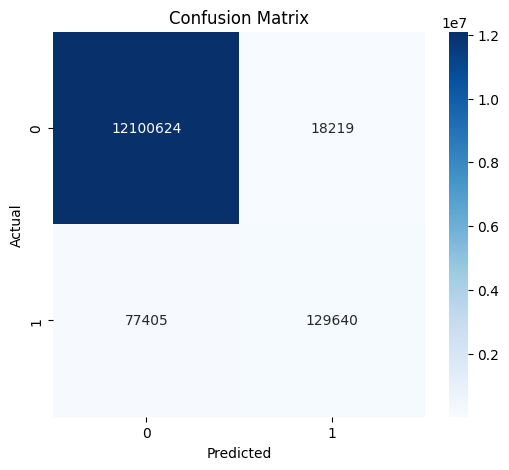

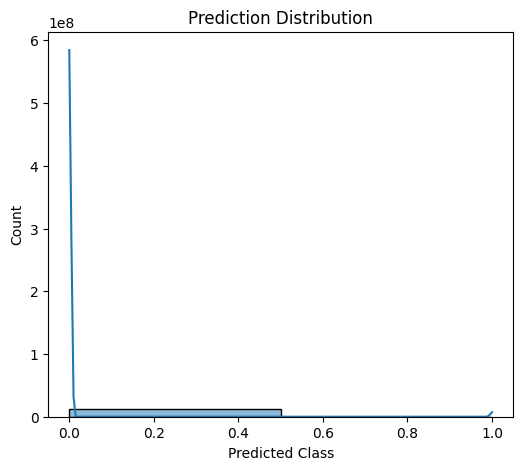

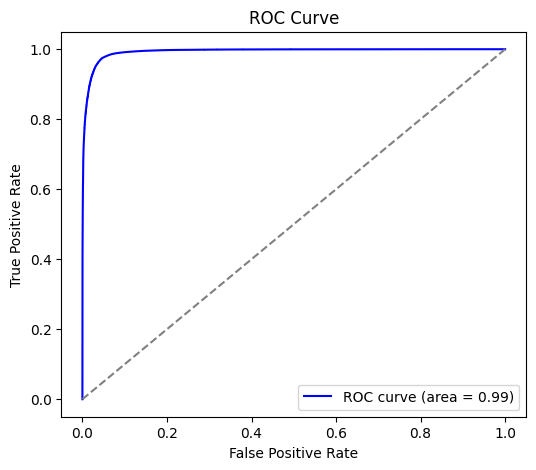

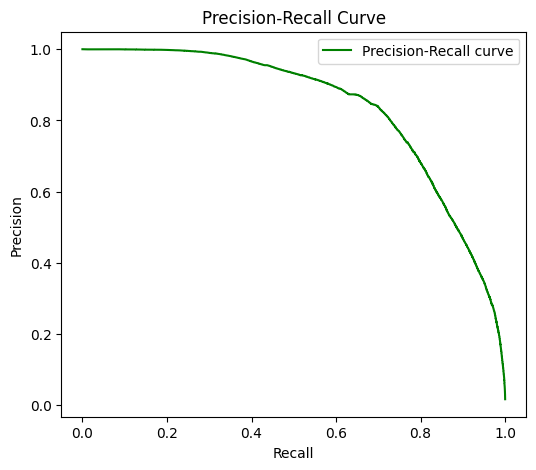

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00  12118843
           1       0.88      0.63      0.73    207045

    accuracy                           0.99  12325888
   macro avg       0.94      0.81      0.86  12325888
weighted avg       0.99      0.99      0.99  12325888



In [43]:
import os
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ensure the directory exists
save_dir = "plots"
os.makedirs(save_dir, exist_ok=True)

if 'y_true' not in locals():
    y_true = df_test["label"].values[:len(y_pred_classes)]
    
# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.savefig(os.path.join(save_dir, "confusion_matrix.png"))
plt.show()

# Prediction Distribution
plt.figure(figsize=(6,5))
sns.histplot(y_pred_classes, bins=len(np.unique(y_true)), kde=True)
plt.xlabel("Predicted Class")
plt.ylabel("Count")
plt.title("Prediction Distribution")
plt.savefig(os.path.join(save_dir, "prediction_distribution.png"))
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_true, y_pred_probs[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.savefig(os.path.join(save_dir, "roc_curve.png"))
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_true, y_pred_probs[:, 1])
plt.figure(figsize=(6,5))
plt.plot(recall, precision, color='green', label="Precision-Recall curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.savefig(os.path.join(save_dir, "precision_recall_curve.png"))
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes))